## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv('Kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

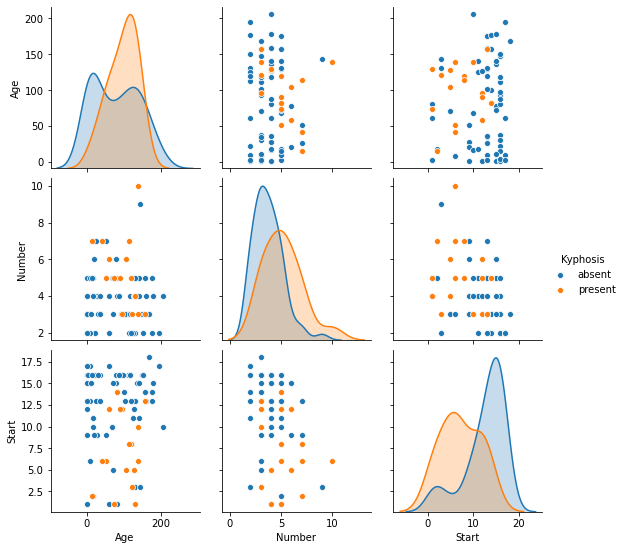

In [3]:
# creating a pairplot with 'Kyphosis' column as hue
sns.pairplot(df, hue = 'Kyphosis')

Summary: <br>
1. Start, Number pair and Start, Age pair plots best seperates the classification of kyphosis.

## Train Test Data split

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion = 'entropy')
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation

In [6]:
y_ = d_tree.predict(X_test)  #prediction values for X_test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_mat = confusion_matrix(y_test, y_)
print(confusion_mat)

[[14  1]
 [ 2  4]]


In [7]:
accuracy = accuracy_score(y_test, y_)
print(accuracy)

0.8571428571428571


In [8]:
report = classification_report(y_test, y_)
print(report)

             precision    recall  f1-score   support

     absent       0.88      0.93      0.90        15
    present       0.80      0.67      0.73         6

avg / total       0.85      0.86      0.85        21



## Tree Visualization

Tree visualization using the pydot, graphviz and sklearn(v0.19.2) 

In [9]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

In [15]:
import pydot

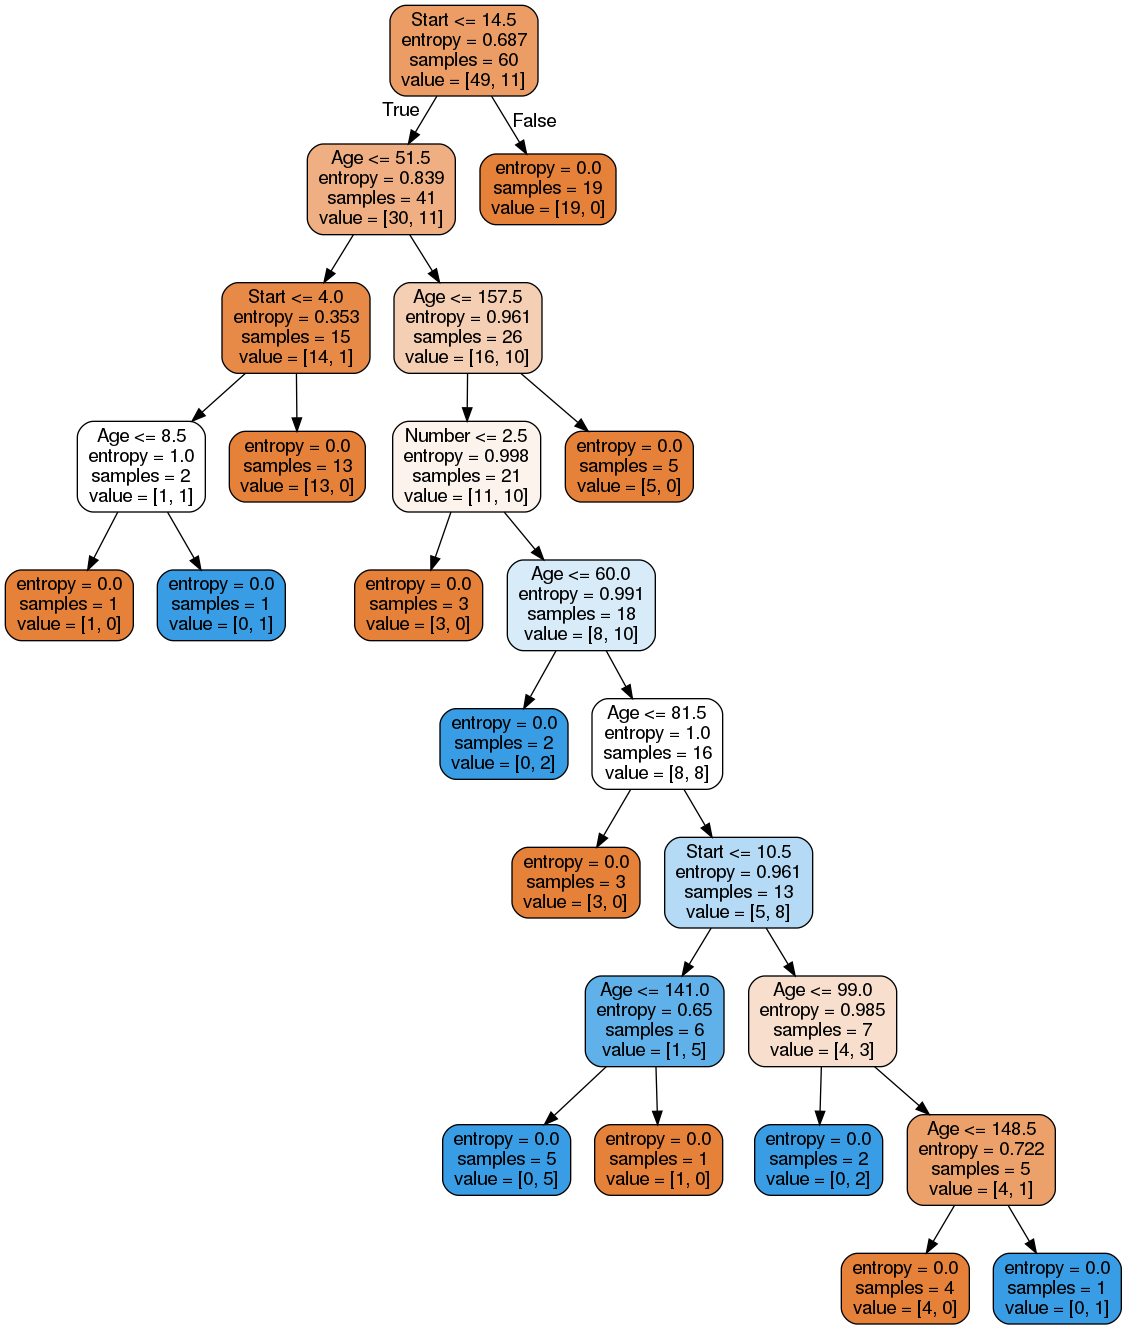

In [17]:
features = list(df.columns[1:])
dot_data = StringIO()
export_graphviz(d_tree, out_file = dot_data, feature_names =features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_tree = RandomForestClassifier(n_estimators=100)
rf_tree.fit(X_train,y_train)

/home/aditya/anaconda3/envs/ml_git/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_ = rf_tree.predict(X_test)
print(confusion_matrix(y_test , y_))

[[14  1]
 [ 3  3]]


In [22]:
print(accuracy_score(y_test, y_))

0.8095238095238095


In [23]:
print(classification_report(y_test, y_))

             precision    recall  f1-score   support

     absent       0.82      0.93      0.87        15
    present       0.75      0.50      0.60         6

avg / total       0.80      0.81      0.80        21



DecisonTreeClassifier performed better with accuracy of 0.85 compared to RandomForestClassifier which has accuracy of 0.80